In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE,RandomOverSampler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB,MultinomialNB,GaussianNB
from sklearn.svm import SVC

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import pickle
import json

### Problem Statement

### Data Gathering

In [2]:
df=pd.read_csv("heart_failure.csv")
df.head(1)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.0,1.9,130,1,0,4,1


### EDA

In [3]:
df.shape

(299, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


<AxesSubplot:>

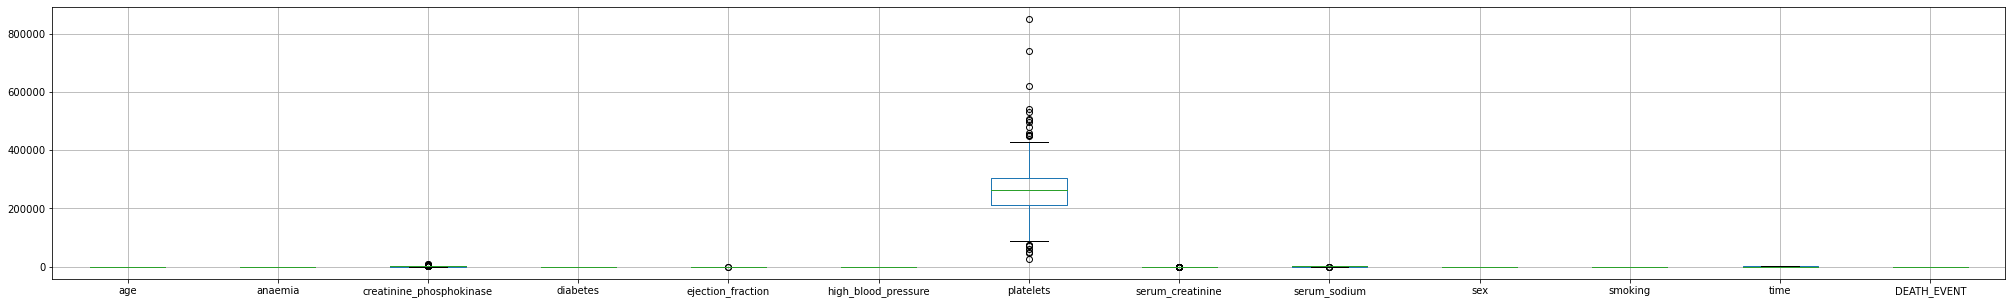

In [6]:
plt.figure(figsize=(35,5))
df.boxplot()

In [7]:
df["DEATH_EVENT"].value_counts() #need to do oversamping either random or SMOTE

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [8]:
# data is continuous vs catagorical

### Feature Engineering

In [9]:
# There are outliers in the feature "platelets" bu due to its relevance we must keep it as it is.

In [10]:
# Target column is biased so oversampling need to be performed on the dataset

### Feature selection

<AxesSubplot:>

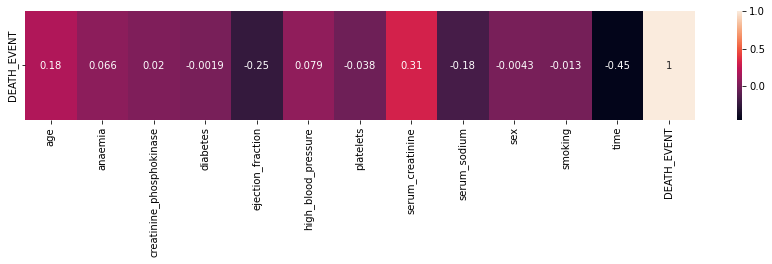

In [11]:
plt.figure(figsize=(15,2))
sns.heatmap(df.corr(method="kendall").tail(1),annot=True)

In [12]:
corr=df.corr(method="spearman").tail(1)

<AxesSubplot:>

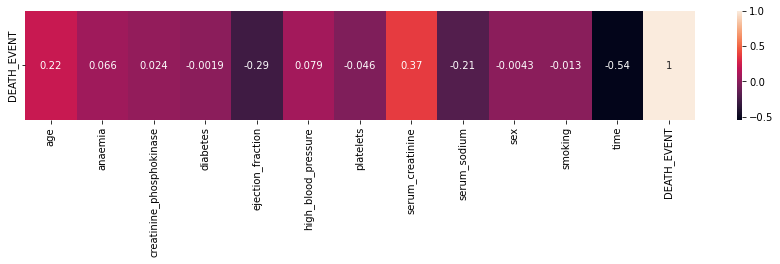

In [13]:
plt.figure(figsize=(15,2))
sns.heatmap(corr,annot=True)

In [14]:
#proceeding with all the features for now.

### Model Training

In [83]:
x=df.drop("DEATH_EVENT",axis=1)
y=df["DEATH_EVENT"]

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=43,stratify=y)

## LOGISTIC REGRESSION

In [85]:
logy=LogisticRegression()
logy.fit(x_train,y_train)

LogisticRegression()

### Model Evaluation on Raw Data

In [86]:
print("Training accuracy",logy.score(x_train,y_train),"Testing accuracy",logy.score(x_test,y_test)) #good accuracy but need improvement

Training accuracy 0.8117154811715481 Testing accuracy 0.85


### Balancing the data for better accuracy

In [19]:
x=df.drop("DEATH_EVENT",axis=1)
y=df["DEATH_EVENT"]

smote = SMOTE()
x1,y1=smote.fit_resample(x,y)

In [20]:
y1.value_counts()

1    203
0    203
Name: DEATH_EVENT, dtype: int64

### Model Evaluation after Balancing the data

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=43,stratify=y1)
logy=LogisticRegression()
logy.fit(x_train,y_train)
print("Training accuracy",logy.score(x_train,y_train),"Testing accuracy",logy.score(x_test,y_test)) #less accuracy

(0.8117283950617284, 0.8170731707317073)

## DECISION TREE

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=43,stratify=y1)

In [23]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

### DT evaluation without hypertuning

In [24]:
print("Training accuracy",dt.score(x_train,y_train),"Testing accuracy",dt.score(x_test,y_test)) #model is overfitting

(1.0, 0.8292682926829268)

### Hyperparamter tuning

In [25]:
model=DecisionTreeClassifier()
hypo = {"criterion":["gini","entropy"],
       "max_depth":np.arange(2,10),
       "min_samples_split":np.arange(2,5),
    "min_samples_leaf":[1,2,3,4],
       "random_state":[40,41,42,43,44,45]}
rscv = RandomizedSearchCV(model,hypo,cv=5)
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': array([2, 3, 4]),
                                        'random_state': [40, 41, 42, 43, 44,
                                                         45]})

In [26]:
rscv.best_params_

{'random_state': 44,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 8,
 'criterion': 'entropy'}

In [27]:
rscv_dt=DecisionTreeClassifier(random_state=40,min_samples_split=3,min_samples_leaf=1,max_depth=6,criterion="gini")
rscv_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=3, random_state=40)

### DT Evaluation with hypertuning

In [28]:
print("Training accuracy",rscv_dt.score(x_train,y_train),"Testing accuracy",rscv_dt.score(x_test,y_test))  # accuracy improved minor overfitting

(0.9537037037037037, 0.8780487804878049)

### prepruning model

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=43,stratify=y1)
dt_pre = DecisionTreeClassifier(random_state=40,ccp_alpha=0.0)
dt_pre.fit(x_train,y_train)

DecisionTreeClassifier(random_state=40)

### Evaluation of prepruned model

In [45]:
print("Training accuracy",dt_pre.score(x_train,y_train),"Testing accuracy",dt_pre.score(x_test,y_test)) #overtfitting before prepruning

(1.0, 0.8414634146341463)

### Pruning for better accuracy

In [48]:
ccp_dict = dt_pre.cost_complexity_pruning_path(x_train,y_train)
ccp_list = ccp_dict["ccp_alphas"]
ccp_list

array([0.        , 0.00277778, 0.00286596, 0.0028873 , 0.0028873 ,
       0.00304414, 0.00305213, 0.00308642, 0.00406397, 0.00454545,
       0.00457436, 0.00462963, 0.00523322, 0.00529101, 0.0053144 ,
       0.00595238, 0.00602523, 0.00740741, 0.00783614, 0.00956938,
       0.01105925, 0.01432146, 0.01683826, 0.02894467, 0.05593562,
       0.18698263])

In [50]:
Train_accuracy_list=[]
Test_accuracy_list=[]
for i in ccp_list:
    dt_post=DecisionTreeClassifier(random_state=40,ccp_alpha=i)
    dt_post.fit(x_train,y_train)
    Train_accuracy_list.append(dt_post.score(x_train,y_train))
    Test_accuracy_list.append(dt_post.score(x_test,y_test))

### Evaluation after pruning

In [51]:
np.where(Test_accuracy_list==max(Test_accuracy_list))

(array([19, 20], dtype=int64),)

In [54]:
ccp_list[19]

0.009569377990430623

In [52]:
print("Train accuracy :",Train_accuracy_list[19],"Test accuracy :",Test_accuracy_list[19])

Train accuracy : 0.8919753086419753 Test accuracy : 0.9024390243902439


In [53]:
print("Train accuracy :",Train_accuracy_list[20],"Test accuracy :",Test_accuracy_list[20])

Train accuracy : 0.8765432098765432 Test accuracy : 0.9024390243902439


In [ ]:
#model having ccp_alpha value =0.009569377990430623 is providing the best accuracy as below:
# Train accuracy : 0.8919753086419753 Test accuracy : 0.9024390243902439

In [55]:
dt_post1=DecisionTreeClassifier(random_state=40,ccp_alpha=0.009569377990430623)
dt_post1.fit(x_train,y_train)
print("Train accuracy :"dt_post1.score(x_train,y_train),"Test accuracy :"dt_post1.score(x_test,y_test))

(0.8919753086419753, 0.9024390243902439)

## SUPPORT VECTOR MACHINE

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=43,stratify=y1)

In [30]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

### SVM Evaluation without hypertuning

In [31]:
print("Training accuracy",svm.score(x_train,y_train),"Testing accuracy",svm.score(x_test,y_test))

(0.5432098765432098, 0.4878048780487805)

### SVM hyperparameter tuning

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=43,stratify=y1)

In [33]:
model = SVC()
hypo = {"C":np.arange(1,20),
    "kernel":['linear', 'poly', 'rbf', 'sigmoid'],
    "random_state":[40,41,42,43,45]}
rscv=RandomizedSearchCV(model,hypo,cv=5)
rscv.fit(x_train,y_train)
rscv.best_estimator_

SVC(C=4, kernel='linear', random_state=41)

In [34]:
svm = SVC(C=4, kernel='linear', random_state=41)
svm.fit(x_train,y_train)

SVC(C=4, kernel='linear', random_state=41)

### SVM Evaluation after hyperparameter tuning

In [81]:
print("Training accuracy",svm.score(x_train,y_train),"Testing accuracy",svm.score(x_test,y_test))  #accuracy reduced but overfitting is under control

Training accuracy 0.7962962962962963 Testing accuracy 0.8170731707317073


## Reconsiliation and conclusion of Models and respective Accuracies

## Feature Selection

#### Using embeded method on best model

<AxesSubplot:>

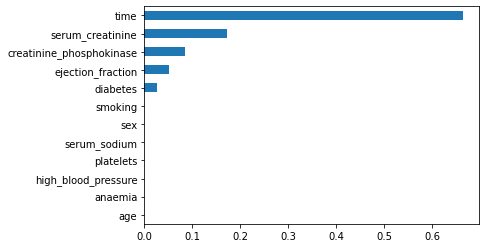

In [57]:
Ser=pd.Series(dt_post1.feature_importances_,index=x.columns)
Ser.sort_values().plot(kind="barh")

#### Using VIF

In [64]:
arr=x1.to_numpy()

In [61]:
x1.shape[1]

12

In [65]:
vif_list=[]
for i in range(x1.shape[1]):
    vif=variance_inflation_factor(arr,i)
    vif_list.append(vif)

<AxesSubplot:>

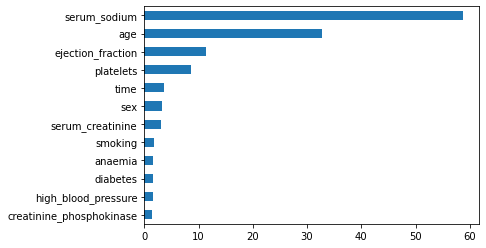

In [63]:
ser_vif=pd.Series(vif_list,index=x1.columns)
ser_vif.sort_values().plot(kind="barh")

## Model training and Evaluation after feature selection

In [75]:
x_new=x1.drop(columns=["high_blood_pressure","anaemia","smoking"],axis=1)
y_new=y1

In [76]:
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=0.2,random_state=43,stratify=y_new)

In [80]:
dt_final=DecisionTreeClassifier(random_state=40,ccp_alpha=0.009569377990430623)
dt_final.fit(x_train,y_train)
print("Training accuracy",dt_final.score(x_train,y_train),"Testing accuracy",dt_final.score(x_test,y_test))

Training accuracy 0.8919753086419753 Testing accuracy 0.9024390243902439


In [ ]:
# Accuracy remains the same after dropping the redundent features

## Exporting project data and ML model

In [96]:
features={"columns":list(x_new.columns)}

In [97]:
with open ("project_data.json","w") as file:
    json.dump(features,file)

In [ ]:
with open ("model.pkl","wb") as file:
    pickle.dump(dt_final,file)

In [101]:
list(x_new.columns)

['age',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'sex',
 'time']

In [102]:
x_new.sample()

,age,creatinine_phosphokinase,diabetes,ejection_fraction,platelets,serum_creatinine,serum_sodium,sex,time
42,70.0,571,1,45,185000.0,1.2,139,1,33


In [103]:
y_new[42]

1